# Imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [2]:
df = pd.read_csv('Predict students dropout and academic success dataset.csv', sep=";")
pd.set_option('display.max_columns', None)
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,5,9,127.3,1,0,0,1,1,0,20,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,3,3,142.5,1,0,0,0,1,0,19,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,9,9,124.8,1,0,0,0,1,0,19,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,5,3,119.6,1,0,0,1,0,0,20,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,9,9,141.5,0,0,0,1,0,0,45,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


# Preprocessing

#### Renaming columns

In [3]:
df = df.rename(columns = {'Daytime/evening attendance\t': 'Daytime/Evening attendace', 'Nacionality': 'Nationality'})
df.head()

,Marital status,Application mode,Application order,Course,Daytime/Evening attendace,Previous qualification,Previous qualification (grade),Nationality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,5,9,127.3,1,0,0,1,1,0,20,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,3,3,142.5,1,0,0,0,1,0,19,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,9,9,124.8,1,0,0,0,1,0,19,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,5,3,119.6,1,0,0,1,0,0,20,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,9,9,141.5,0,0,0,1,0,0,45,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


#### Checking for missing values

In [4]:
df.isnull().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/Evening attendace                         0
Previous qualification                            0
Previous qualification (grade)                    0
Nationality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrol

#### Applying One-hot-encoding to categorical columns

In [5]:
OHE_df = pd.get_dummies(df, columns = ['Marital status', 'Application mode', 'Course', 'Previous qualification', 'Nationality', 'Mother\'s qualification', 'Father\'s qualification', 'Mother\'s occupation', 'Father\'s occupation'])
OHE_df.head()

,Application order,Daytime/Evening attendace,Previous qualification (grade),Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target,Marital status_1,Marital status_2,Marital status_3,Marital status_4,Marital status_5,Marital status_6,Application mode_1,Application mode_2,Application mode_5,Application mode_7,Application mode_10,Application mode_15,Application mode_16,Application mode_17,Application mode_18,Application mode_26,Application mode_27,Application mode_39,Application mode_42,Application mode_43,Application mode_44,Application mode_51,Application mode_53,Application mode_57,Course_33,Course_171,Course_8014,Course_9003,Course_9070,Course_9085,Course_9119,Course_9130,Course_9147,Course_9238,Course_9254,Course_9500,Course_9556,Course_9670,Course_9773,Course_9853,Course_9991,Previous qualification_1,Previous qualification_2,Previous qualification_3,Previous qualification_4,Previous qualification_5,Previous qualification_6,Previous qualification_9,Previous qualification_10,Previous qualification_12,Previous qualification_14,Previous qualification_15,Previous qualification_19,Previous qualification_38,Previous qualification_39,Previous qualification_40,Previous qualification_42,Previous qualification_43,Nationality_1,Nationality_2,Nationality_6,Nationality_11,Nationality_13,Nationality_14,Nationality_17,Nationality_21,Nationality_22,Nationality_24,Nationality_25,Nationality_26,Nationality_32,Nationality_41,Nationality_62,Nationality_100,Nationality_101,Nationality_103,Nationality_105,Nationality_108,Nationality_109,Mother's qualification_1,Mother's qualification_2,Mother's qualification_3,Mother's qualification_4,Mother's qualification_5,Mother's qualification_6,Mother's qualification_9,Mother's qualification_10,Mother's qualification_11,Mother's qualification_12,Mother's qualification_14,Mother's qualification_18,Mother's qualification_19,Mother's qualification_22,Mother's qualification_26,Mother's qualification_27,Mother's qualification_29,Mother's qualification_30,Mother's qualification_34,Mother's qualification_35,Mother's qualification_36,Mother's qualification_37,Mother's qualification_38,Mother's qualification_39,Mother's qualification_40,Mother's qualification_41,Mother's qualification_42,Mother's qualification_43,Mother's qualification_44,Father's qualification_1,Father's qualification_2,Father's qualification_3,Father's qualification_4,Father's qualification_5,Father's qualification_6,Father's qualification_9,Father's qualification_10,Father's qualification_11,Father's qualification_12,Father's qualification_13,Father's qualification_14,Father's qualification_18,Father's qualification_19,Father's qualification_20,Father's qualification_22,Father's qualification_25,Father's qualification_26,Father's qualification_27,Father's qualification_29,Father's qualification_30,Father's qualification_31,Father's qualification_33,Father's qualification_34,Father's qualification_35,Father's qualification_36,Father's qualification_37,Father's qualification_38,Father's qualification_39,Father's qualification_40,Father's qualification_41,Father's qualification_42,Father's qualification_43,Father's qualification_44,Mother's occupation_0,Mother's occupation_1,Mother's occupation_2,Mother's occupation_3,Mother's occupation_4,Mother's occupation_5,Mother's occupation_6,Mother's occupation_7,Mother's occupation_8,Mother's occupation_9,Mother's occupation_10,Mother

In [6]:
print("No. of columns of One-hot-encoded dataset: " + str(len(OHE_df.columns)) + "\nNo. of columns of original dataset: " + str(len(df.columns)))

No. of columns of One-hot-encoded dataset: 248
No. of columns of original dataset: 37


In [7]:
len(df)

4424

# Dataset Splitting
## 70% train 15% validation 15% test

In [8]:
OHE_train_df, OHE_val_df, OHE_test_df = np.split(OHE_df.sample(frac=1, random_state=16),[int(0.7*len(OHE_df)), int(0.85*len(OHE_df))])

print("train_df len: " + str(len(OHE_train_df)) + "\nval_df len: " + str(len(OHE_val_df)) + "\ntest_df len: " + str(len(OHE_test_df)))

train_df len: 3096
val_df len: 664
test_df len: 664


In [9]:
OHE_train_df.head()

,Application order,Daytime/Evening attendace,Previous qualification (grade),Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target,Marital status_1,Marital status_2,Marital status_3,Marital status_4,Marital status_5,Marital status_6,Application mode_1,Application mode_2,Application mode_5,Application mode_7,Application mode_10,Application mode_15,Application mode_16,Application mode_17,Application mode_18,Application mode_26,Application mode_27,Application mode_39,Application mode_42,Application mode_43,Application mode_44,Application mode_51,Application mode_53,Application mode_57,Course_33,Course_171,Course_8014,Course_9003,Course_9070,Course_9085,Course_9119,Course_9130,Course_9147,Course_9238,Course_9254,Course_9500,Course_9556,Course_9670,Course_9773,Course_9853,Course_9991,Previous qualification_1,Previous qualification_2,Previous qualification_3,Previous qualification_4,Previous qualification_5,Previous qualification_6,Previous qualification_9,Previous qualification_10,Previous qualification_12,Previous qualification_14,Previous qualification_15,Previous qualification_19,Previous qualification_38,Previous qualification_39,Previous qualification_40,Previous qualification_42,Previous qualification_43,Nationality_1,Nationality_2,Nationality_6,Nationality_11,Nationality_13,Nationality_14,Nationality_17,Nationality_21,Nationality_22,Nationality_24,Nationality_25,Nationality_26,Nationality_32,Nationality_41,Nationality_62,Nationality_100,Nationality_101,Nationality_103,Nationality_105,Nationality_108,Nationality_109,Mother's qualification_1,Mother's qualification_2,Mother's qualification_3,Mother's qualification_4,Mother's qualification_5,Mother's qualification_6,Mother's qualification_9,Mother's qualification_10,Mother's qualification_11,Mother's qualification_12,Mother's qualification_14,Mother's qualification_18,Mother's qualification_19,Mother's qualification_22,Mother's qualification_26,Mother's qualification_27,Mother's qualification_29,Mother's qualification_30,Mother's qualification_34,Mother's qualification_35,Mother's qualification_36,Mother's qualification_37,Mother's qualification_38,Mother's qualification_39,Mother's qualification_40,Mother's qualification_41,Mother's qualification_42,Mother's qualification_43,Mother's qualification_44,Father's qualification_1,Father's qualification_2,Father's qualification_3,Father's qualification_4,Father's qualification_5,Father's qualification_6,Father's qualification_9,Father's qualification_10,Father's qualification_11,Father's qualification_12,Father's qualification_13,Father's qualification_14,Father's qualification_18,Father's qualification_19,Father's qualification_20,Father's qualification_22,Father's qualification_25,Father's qualification_26,Father's qualification_27,Father's qualification_29,Father's qualification_30,Father's qualification_31,Father's qualification_33,Father's qualification_34,Father's qualification_35,Father's qualification_36,Father's qualification_37,Father's qualification_38,Father's qualification_39,Father's qualification_40,Father's qualification_41,Father's qualification_42,Father's qualification_43,Father's qualification_44,Mother's occupation_0,Mother's occupation_1,Mother's occupation_2,Mother's occupation_3,Mother's occupation_4,Mother's occupation_5,Mother's occupation_6,Mother's occupation_7,Mother's occupation_8,Mother's occupation_9,Mother's occupation_10,Mother

In [10]:
OHE_val_df.head()

,Application order,Daytime/Evening attendace,Previous qualification (grade),Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target,Marital status_1,Marital status_2,Marital status_3,Marital status_4,Marital status_5,Marital status_6,Application mode_1,Application mode_2,Application mode_5,Application mode_7,Application mode_10,Application mode_15,Application mode_16,Application mode_17,Application mode_18,Application mode_26,Application mode_27,Application mode_39,Application mode_42,Application mode_43,Application mode_44,Application mode_51,Application mode_53,Application mode_57,Course_33,Course_171,Course_8014,Course_9003,Course_9070,Course_9085,Course_9119,Course_9130,Course_9147,Course_9238,Course_9254,Course_9500,Course_9556,Course_9670,Course_9773,Course_9853,Course_9991,Previous qualification_1,Previous qualification_2,Previous qualification_3,Previous qualification_4,Previous qualification_5,Previous qualification_6,Previous qualification_9,Previous qualification_10,Previous qualification_12,Previous qualification_14,Previous qualification_15,Previous qualification_19,Previous qualification_38,Previous qualification_39,Previous qualification_40,Previous qualification_42,Previous qualification_43,Nationality_1,Nationality_2,Nationality_6,Nationality_11,Nationality_13,Nationality_14,Nationality_17,Nationality_21,Nationality_22,Nationality_24,Nationality_25,Nationality_26,Nationality_32,Nationality_41,Nationality_62,Nationality_100,Nationality_101,Nationality_103,Nationality_105,Nationality_108,Nationality_109,Mother's qualification_1,Mother's qualification_2,Mother's qualification_3,Mother's qualification_4,Mother's qualification_5,Mother's qualification_6,Mother's qualification_9,Mother's qualification_10,Mother's qualification_11,Mother's qualification_12,Mother's qualification_14,Mother's qualification_18,Mother's qualification_19,Mother's qualification_22,Mother's qualification_26,Mother's qualification_27,Mother's qualification_29,Mother's qualification_30,Mother's qualification_34,Mother's qualification_35,Mother's qualification_36,Mother's qualification_37,Mother's qualification_38,Mother's qualification_39,Mother's qualification_40,Mother's qualification_41,Mother's qualification_42,Mother's qualification_43,Mother's qualification_44,Father's qualification_1,Father's qualification_2,Father's qualification_3,Father's qualification_4,Father's qualification_5,Father's qualification_6,Father's qualification_9,Father's qualification_10,Father's qualification_11,Father's qualification_12,Father's qualification_13,Father's qualification_14,Father's qualification_18,Father's qualification_19,Father's qualification_20,Father's qualification_22,Father's qualification_25,Father's qualification_26,Father's qualification_27,Father's qualification_29,Father's qualification_30,Father's qualification_31,Father's qualification_33,Father's qualification_34,Father's qualification_35,Father's qualification_36,Father's qualification_37,Father's qualification_38,Father's qualification_39,Father's qualification_40,Father's qualification_41,Father's qualification_42,Father's qualification_43,Father's qualification_44,Mother's occupation_0,Mother's occupation_1,Mother's occupation_2,Mother's occupation_3,Mother's occupation_4,Mother's occupation_5,Mother's occupation_6,Mother's occupation_7,Mother's occupation_8,Mother's occupation_9,Mother's occupation_10,Mother

In [11]:
OHE_test_df.head()

,Application order,Daytime/Evening attendace,Previous qualification (grade),Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target,Marital status_1,Marital status_2,Marital status_3,Marital status_4,Marital status_5,Marital status_6,Application mode_1,Application mode_2,Application mode_5,Application mode_7,Application mode_10,Application mode_15,Application mode_16,Application mode_17,Application mode_18,Application mode_26,Application mode_27,Application mode_39,Application mode_42,Application mode_43,Application mode_44,Application mode_51,Application mode_53,Application mode_57,Course_33,Course_171,Course_8014,Course_9003,Course_9070,Course_9085,Course_9119,Course_9130,Course_9147,Course_9238,Course_9254,Course_9500,Course_9556,Course_9670,Course_9773,Course_9853,Course_9991,Previous qualification_1,Previous qualification_2,Previous qualification_3,Previous qualification_4,Previous qualification_5,Previous qualification_6,Previous qualification_9,Previous qualification_10,Previous qualification_12,Previous qualification_14,Previous qualification_15,Previous qualification_19,Previous qualification_38,Previous qualification_39,Previous qualification_40,Previous qualification_42,Previous qualification_43,Nationality_1,Nationality_2,Nationality_6,Nationality_11,Nationality_13,Nationality_14,Nationality_17,Nationality_21,Nationality_22,Nationality_24,Nationality_25,Nationality_26,Nationality_32,Nationality_41,Nationality_62,Nationality_100,Nationality_101,Nationality_103,Nationality_105,Nationality_108,Nationality_109,Mother's qualification_1,Mother's qualification_2,Mother's qualification_3,Mother's qualification_4,Mother's qualification_5,Mother's qualification_6,Mother's qualification_9,Mother's qualification_10,Mother's qualification_11,Mother's qualification_12,Mother's qualification_14,Mother's qualification_18,Mother's qualification_19,Mother's qualification_22,Mother's qualification_26,Mother's qualification_27,Mother's qualification_29,Mother's qualification_30,Mother's qualification_34,Mother's qualification_35,Mother's qualification_36,Mother's qualification_37,Mother's qualification_38,Mother's qualification_39,Mother's qualification_40,Mother's qualification_41,Mother's qualification_42,Mother's qualification_43,Mother's qualification_44,Father's qualification_1,Father's qualification_2,Father's qualification_3,Father's qualification_4,Father's qualification_5,Father's qualification_6,Father's qualification_9,Father's qualification_10,Father's qualification_11,Father's qualification_12,Father's qualification_13,Father's qualification_14,Father's qualification_18,Father's qualification_19,Father's qualification_20,Father's qualification_22,Father's qualification_25,Father's qualification_26,Father's qualification_27,Father's qualification_29,Father's qualification_30,Father's qualification_31,Father's qualification_33,Father's qualification_34,Father's qualification_35,Father's qualification_36,Father's qualification_37,Father's qualification_38,Father's qualification_39,Father's qualification_40,Father's qualification_41,Father's qualification_42,Father's qualification_43,Father's qualification_44,Mother's occupation_0,Mother's occupation_1,Mother's occupation_2,Mother's occupation_3,Mother's occupation_4,Mother's occupation_5,Mother's occupation_6,Mother's occupation_7,Mother's occupation_8,Mother's occupation_9,Mother's occupation_10,Mother

# Feature Selection

In [12]:
#Separate the features (X) and target labels (y) for each dataset
X_train = OHE_train_df.drop(columns=['Target'])
y_train = OHE_train_df['Target']

X_val = OHE_val_df.drop(columns=['Target'])
y_val = OHE_val_df['Target']

X_test = OHE_test_df.drop(columns=['Target'])
y_test = OHE_test_df['Target']

#### LDA

In [13]:
#fit the LDA model on the training data
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

# Transform the training, validation, and test data using LDA model
X_train_lda = lda.transform(X_train)
X_val_lda = lda.transform(X_val)
X_test_lda = lda.transform(X_test)

In [14]:
print(X_train_lda.shape)  # Check the shape of X_train_lda
print(X_train_lda[:5])

(3096, 2)
[[-0.24873562 -1.67019827]
 [-2.95486358  1.03194843]
 [ 1.60021378  0.09489255]
 [ 1.54517494  0.4371516 ]
 [ 1.01505632 -0.04368908]]


In [15]:
y_train_lda = y_train.reset_index()
y_train_lda

,index,Target
0,2586,Enrolled
1,3947,Dropout
2,2080,Graduate
3,1944,Dropout
4,931,Graduate
...,...,...
3091,24,Graduate
3092,1458,Enrolled
3093,2902,Graduate
3094,1859,Enrolled


In [16]:
b=y_train_lda.iloc[:,1:].values
b

array([['Enrolled'],
       ['Dropout'],
       ['Graduate'],
       ...,
       ['Graduate'],
       ['Enrolled'],
       ['Dropout']], dtype=object)

In [17]:
labels = b

labelss = [0]*3096

i = 0

for ctr in labels:
    if ctr == 'Dropout':
        labelss[i] = 0
        i+=1
    if ctr == 'Enrolled':
        labelss[i] = 1
        i+=1
    if ctr == 'Graduate':
        labelss[i] = 2
        i+=1

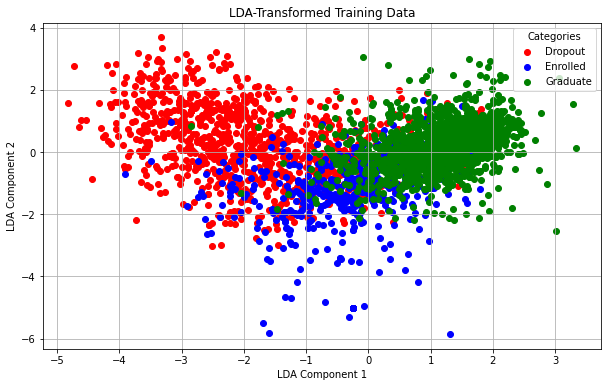

In [18]:
categories = np.unique(labelss)
category_labels = ['Dropout', 'Enrolled', 'Graduate']
color_mapping = {0: 'red', 1: 'blue', 2: 'green'}

plt.figure(figsize=(10, 6))
scatter_handles = []

for category, label in zip(categories, category_labels):
    #filter data points per category
    X_category = X_train_lda[labelss == category]
    
    scatter = plt.scatter(X_category[:, 0], X_category[:, 1], label=label, color=color_mapping[category])
    
    #for legend
    scatter_handles.append(scatter)


plt.title('LDA-Transformed Training Data')
plt.xlabel('LDA Component 1')
plt.ylabel('LDA Component 2')
plt.grid(True)
legend = plt.legend(category_labels, loc='upper right')
legend.set_title('Categories')
plt.show()


#### Forward Selection

In [26]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

In [30]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Initialize an empty set of selected features
selected_features = []
best_score = 0
best_model = None

while True:
    best_feature = None
    for feature in X_train.columns:
        if feature not in selected_features:
            # Create a subset of features with the new feature
            features_to_use = selected_features + [feature]
            X_train_subset = X_train[features_to_use]
            X_val_subset = X_val[features_to_use]

            # Train a logistic regression model
            model = LogisticRegression(max_iter =5000)
            model.fit(X_train_subset, y_train)

            # Evaluate the model's accuracy on the validation set
            y_val_pred = model.predict(X_val_subset)
            score = accuracy_score(y_val, y_val_pred)

            if score > best_score:
                best_score = score
                best_feature = feature
                best_model = model
    
    if best_feature is not None:
        selected_features.append(best_feature)
        print(f"Selected Feature: {best_feature}, Validation Accuracy: {best_score:.4f}")
    else:
        # No improvement, stop the loop
        break

# Evaluate the final model on the test set
X_test_subset = X_test[selected_features]
y_test_pred = best_model.predict(X_test_subset)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy with Selected Features: {test_accuracy:.4f}")


Selected Feature: Curricular units 2nd sem (approved), Validation Accuracy: 0.7229
Selected Feature: Tuition fees up to date, Validation Accuracy: 0.7349
Selected Feature: Curricular units 2nd sem (enrolled), Validation Accuracy: 0.7545
Selected Feature: Application mode_39, Validation Accuracy: 0.7605
Selected Feature: Curricular units 1st sem (approved), Validation Accuracy: 0.7636
Selected Feature: Course_171, Validation Accuracy: 0.7711
Selected Feature: Father's qualification_38, Validation Accuracy: 0.7786
Selected Feature: Course_9130, Validation Accuracy: 0.7801
Selected Feature: Course_9119, Validation Accuracy: 0.7831
Selected Feature: Course_9238, Validation Accuracy: 0.7846
Selected Feature: Marital status_4, Validation Accuracy: 0.7861
Selected Feature: Father's occupation_3, Validation Accuracy: 0.7892
Selected Feature: Course_9254, Validation Accuracy: 0.7907
Selected Feature: International, Validation Accuracy: 0.7922
Selected Feature: Course_8014, Validation Accuracy: 

In [21]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Initialize an empty set of selected features
selected_features = []
best_score = 0
best_model = None

while True:
    best_feature = None
    for feature in X_train.columns:
        if feature not in selected_features:
            # Create a subset of features with the new feature
            features_to_use = selected_features + [feature]
            X_train_subset = X_train[features_to_use]
            X_val_subset = X_val[features_to_use]

            # Train a logistic regression model
            model = LogisticRegression(max_iter =1000)
            model.fit(X_train_subset, y_train)

            # Evaluate the model's accuracy on the validation set
            y_val_pred = model.predict(X_val_subset)
            score = accuracy_score(y_val, y_val_pred)

            if score > best_score:
                best_score = score
                best_feature = feature
                best_model = model
    
    if best_feature is not None:
        selected_features.append(best_feature)
        print(f"Selected Feature: {best_feature}, Validation Accuracy: {best_score:.4f}")
    else:
        # No improvement, stop the loop
        break

# Evaluate the final model on the test set
X_test_subset = X_test[selected_features]
y_test_pred = best_model.predict(X_test_subset)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy with Selected Features: {test_accuracy:.4f}")

Selected Feature: Curricular units 2nd sem (approved), Validation Accuracy: 0.7229
Selected Feature: Tuition fees up to date, Validation Accuracy: 0.7349
Selected Feature: Curricular units 2nd sem (enrolled), Validation Accuracy: 0.7545
Selected Feature: Application mode_39, Validation Accuracy: 0.7605
Selected Feature: Curricular units 1st sem (approved), Validation Accuracy: 0.7636
Selected Feature: Course_171, Validation Accuracy: 0.7711


/Users/shaneenriquez/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/shaneenriquez/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

Selected Feature: Father's qualification_38, Validation Accuracy: 0.7786
Selected Feature: Course_9130, Validation Accuracy: 0.7801


/Users/shaneenriquez/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/shaneenriquez/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

Selected Feature: Course_9119, Validation Accuracy: 0.7831


/Users/shaneenriquez/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/shaneenriquez/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

Selected Feature: Course_9238, Validation Accuracy: 0.7846


/Users/shaneenriquez/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/shaneenriquez/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

KeyboardInterrupt: 

#### Decision-tree

In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Initialize a Decision Tree classifier
clf = DecisionTreeClassifier(random_state=42)

# Train the Decision Tree classifier on the training data
clf.fit(X_train, y_train)

# Predict on the validation data
y_val_pred = clf.predict(X_val)

# Calculate the accuracy on the validation data
validation_accuracy = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy: {validation_accuracy:.4f}")

# Predict on the test data
y_test_pred = clf.predict(X_test)

# Calculate the accuracy on the test data
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy:.4f}")


Validation Accuracy: 0.6958
Test Accuracy: 0.7289


# Machine Learning Models

### Supervised Learning Model

#### SVM

#### Decision Tree

#### Neural Network

#### KNN

### Unsupervised Learning Model